# Entrainement 

## Without rotation

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_49705/661797096.py:76: RuntimeWarning: divide by zero encountered in log10
  ax2.plot(np.log10(NN[iPlt, :]), zi[iPlt, :])
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_49705/661797096.py:85: RuntimeWarning: divide by zero encountered in log10
  ax3.plot(np.log10(nuh[iPlt, :]), zi[iPlt, :])


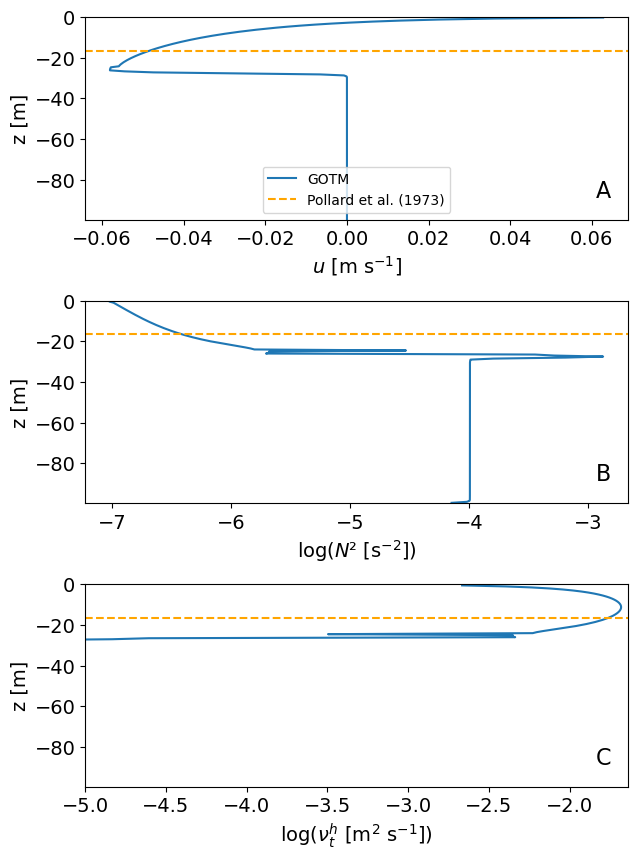

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_49705/661797096.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gist_heat')
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_49705/661797096.py:127: RuntimeWarning: divide by zero encountered in log10
  levels = MaxNLocator(nbins=40).tick_values(np.log10(NN).min(), np.log10(NN).max())
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_49705/661797096.py:128: RuntimeWarning: divide by zero encountered in log10
  CS2 = ax2.contourf(t/hour, zi1D, np.log10(NN.T), levels=levels, cmap=cmap.reversed())
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_49705/661797096.py:144: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use `

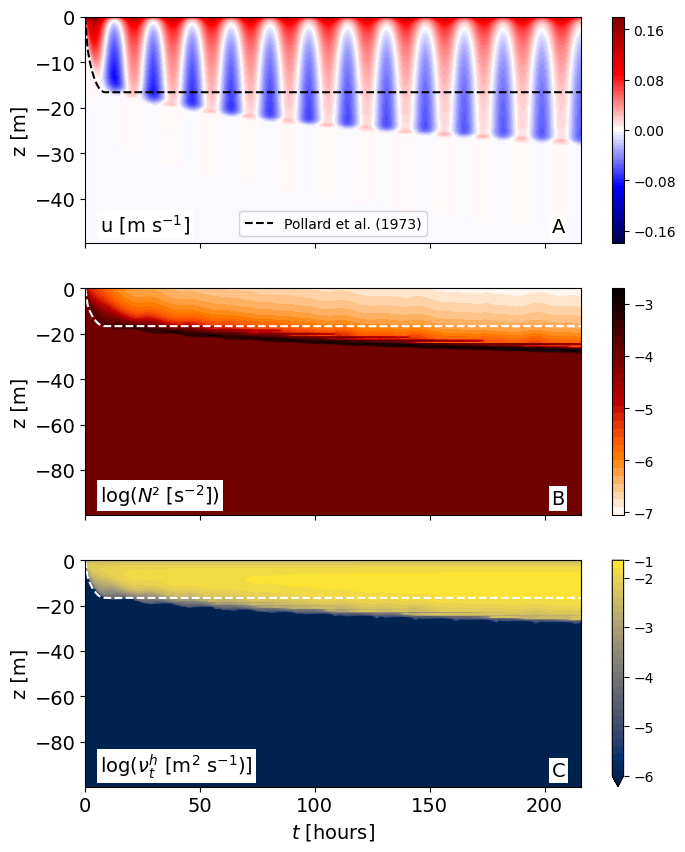

In [1]:

# load required packages
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib import colors


# model parameters (have to be consistent with gotm.yaml)
NN0     = 1.0e-4                    # initial NN 
lat     = 45.0                      # latitude 
tx      = 0.1027                    # surface stress

# derived parameters
f       = 4.*np.pi/86400.*np.sin(np.pi*lat/180.)      # Coriolis parameter
us      = np.sqrt(tx/1027.)                           # surface friction velocity

# load variables from netCDF
file        = 'entrainment_norot_5j.nc'
#file        = 'entrainment_rot.nc'
file        = 'entrainment_rot_10j.nc'
#file = 'f_n_min.nc'
#file = 'entrainment.nc'
entrainment = nc.Dataset(file)

z       = entrainment.variables['z'][:, :, 0, 0]
zi      = entrainment.variables['zi'][:, :, 0, 0]
t       = entrainment.variables['time'][:]
u       = entrainment.variables['u'][:, :, 0, 0]
v       = entrainment.variables['v'][:, :, 0, 0]
nuh     = entrainment.variables['nuh'][:, :, 0, 0]
NN      = entrainment.variables['NN'][:, :, 0, 0]
u_taus  = entrainment.variables['u_taus'][:, 0, 0]


# plot all following profiles at time index iPlt
NT      = t.size
iPlt    = NT-1

# water depth
H       = - z[iPlt,0]



# entrainment depth without rotation (Pollard et al., 1973; Price, 1979)
Rv      = 0.6    # bulk Richardson number
hh_poll_norot        = (2*Rv)**0.25 * us * (t/np.sqrt(NN0))**0.5



# entrainment depth with rotation (Pollard et al., 1973)
Rv      = 1.0    # bulk Richardson number
h       = us * ( ( 4*Rv*(1.0 - np.cos(f * t)) ) / ( f**2.0 * NN0 ) )**0.25
h_ref   = (8*Rv)**0.25 * us / ( f*np.sqrt(NN0) )**0.5

h[np.where(t > np.pi/f)] = h_ref


# plot vertical profiles at time index iPlt
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(7, 10))
plt.subplots_adjust(hspace=0.4)

bprops = {'facecolor': 'white', 'edgecolor': 'none', 'pad': 2}     # text label box properties

ax1.plot(u[iPlt, :], z[iPlt, :], label='GOTM')
ax1.axhline(y=-h_ref,color='orange', linestyle='--', label='Pollard et al. (1973)')
ax1.set_xlabel('$u$ [m s$^{-1}$]', fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
#ax1.set_xlim([0, 1.1*np.max(u[iPlt, :])])
ax1.set_ylim([-H, 0])
ax1.legend(loc='lower center')
ax1.text(0.97, 0.2, 'A', verticalalignment='top', horizontalalignment='right',
         transform=ax1.transAxes, fontsize=16, bbox=bprops)
ax1.tick_params(labelsize=14)

ax2.plot(np.log10(NN[iPlt, :]), zi[iPlt, :])
ax2.axhline(y=-h_ref,color='orange', linestyle='--')
ax2.set_xlabel(r'log($N²$ [s$^{-2}$])', fontsize=14)
ax2.set_ylabel('z [m]', fontsize=14)
ax2.text(0.97, 0.2, 'B', verticalalignment='top', horizontalalignment='right',
         transform=ax2.transAxes, fontsize=16, bbox=bprops)
ax2.set_ylim([-H, 0])
ax2.tick_params(labelsize=14)

ax3.plot(np.log10(nuh[iPlt, :]), zi[iPlt, :])
ax3.axhline(y=-h_ref,color='orange', linestyle='--')
ax3.set_xlabel(r'log($\nu^h_t$ [m$^2$ s$^{-1}$])', fontsize=14)
ax3.set_ylabel('z [m]', fontsize=14)
ax3.set_xlim([-5, np.log10(1.1*np.max(nuh[iPlt, :]))])
ax3.set_ylim([-H, 0])
ax3.text(0.97, 0.2, 'C', verticalalignment='top', horizontalalignment='right',
         transform=ax3.transAxes, fontsize=16, bbox=bprops)
ax3.tick_params(labelsize=14)

plt.savefig('entrainment.png')
plt.show()


# plot contour plot of entire time series
fig2, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8, 10))
plt.subplots_adjust(hspace=0.2)

# generate 1D z-axes for plotting (assuming that grid doesn't change)
z1D   = z[0, :]
zi1D  = zi[0, :]

hour  = 3600

levels = MaxNLocator(nbins=100).tick_values(-u.max(), u.max())
CS1 = ax1.contourf(t/hour, z1D,  (u).T, levels=levels, cmap='seismic')
ax1.plot(t/hour, -h, '--', color='black',label='Pollard et al. (1973)')
ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.text(0.03, 0.03, 'u [m s$^{-1}$]', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.legend(loc='lower center')
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H+50, 0])
ax1.tick_params(labelsize=14)
ax1.xaxis.set_ticklabels([])
colorbar = fig2.colorbar(CS1, ax=ax1)
tick_locator = MaxNLocator(nbins=5)
colorbar.locator = tick_locator
colorbar.update_ticks()

cmap = plt.cm.get_cmap('gist_heat')
levels = MaxNLocator(nbins=40).tick_values(np.log10(NN).min(), np.log10(NN).max())
CS2 = ax2.contourf(t/hour, zi1D, np.log10(NN.T), levels=levels, cmap=cmap.reversed())
ax2.plot(t/hour, -h, '--', color='white')
#ax2.axhline(y=-h_ref,color='white', linestyle='--')
ax2.text(0.94, 0.03, 'B', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.text(0.03, 0.03, r'log($N²$ [s$^{-2}$])', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.set_ylabel('z [m]', fontsize=14)
ax2.set_ylim([-H, 0])
ax2.tick_params(labelsize=14)
ax2.xaxis.set_ticklabels([])
colorbar2 = fig2.colorbar(CS2, ax=ax2)
tick_locator = MaxNLocator(nbins=5)
colorbar2.locator = tick_locator
colorbar2.update_ticks()

cmap = plt.cm.get_cmap('cividis')
levels = MaxNLocator(nbins=40).tick_values(-6, np.log10(nuh).max())
CS3 = ax3.contourf(t/hour, zi1D, np.log10(nuh.T), levels=levels, extend='min', cmap=cmap)
ax3.plot(t/hour, -h, '--', color='white')
#ax3.axhline(y=-h_ref,color='white', linestyle='--')
ax3.text(0.94, 0.03, 'C', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax3.transAxes, fontsize=14, bbox=bprops)
ax3.text(0.03, 0.03, r'log($\nu^h_t$ [m$^2$ s$^{-1})$]', verticalalignment='bottom',
         horizontalalignment='left', backgroundcolor='w', transform=ax3.transAxes,
         fontsize=14, bbox=bprops)
ax3.set_xlabel('$t$ [hours]', fontsize=14)
ax3.set_ylabel('z [m]', fontsize=14)
ax3.set_ylim([-H, 0])
ax3.tick_params(labelsize=14)
tick_locator = MaxNLocator(nbins=5)
colorbar3 = fig2.colorbar(CS3, ax=ax3)
colorbar3.locator = tick_locator
colorbar3.update_ticks()

plt.savefig('entrainment2.png')
plt.show()


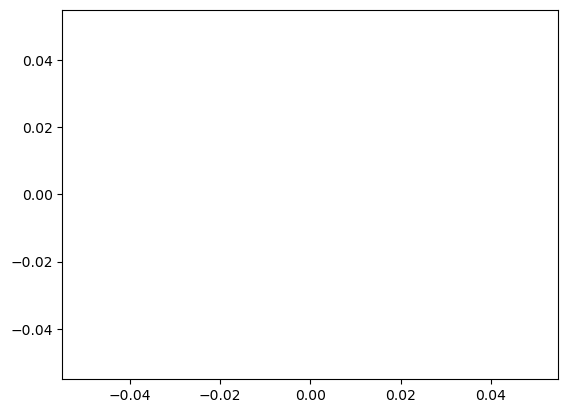

In [3]:

plt.plot(u[-1,950:],z1D[950:])

In [4]:
np.shape(u)


(217, 200)

In [27]:
t

masked_array(data=[     0.,   3600.,   7200.,  10800.,  14400.,  18000.,
                    21600.,  25200.,  28800.,  32400.,  36000.,  39600.,
                    43200.,  46800.,  50400.,  54000.,  57600.,  61200.,
                    64800.,  68400.,  72000.,  75600.,  79200.,  82800.,
                    86400.,  90000.,  93600.,  97200., 100800., 104400.,
                   108000., 111600., 115200., 118800., 122400., 126000.,
                   129600., 133200., 136800., 140400., 144000., 147600.,
                   151200., 154800., 158400., 162000., 165600., 169200.,
                   172800., 176400., 180000., 183600., 187200., 190800.,
                   194400., 198000., 201600., 205200., 208800., 212400.,
                   216000., 219600., 223200., 226800., 230400., 234000.,
                   237600., 241200., 244800., 248400., 252000., 255600.,
                   259200.],
             mask=False,
       fill_value=1e+20)

## With Rotation

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_33084/861205145.py:70: RuntimeWarning: divide by zero encountered in log10
  ax2.plot(np.log10(NN[iPlt, :]), zi[iPlt, :])
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_33084/861205145.py:79: RuntimeWarning: divide by zero encountered in log10
  ax3.plot(np.log10(nuh[iPlt, :]), zi[iPlt, :])


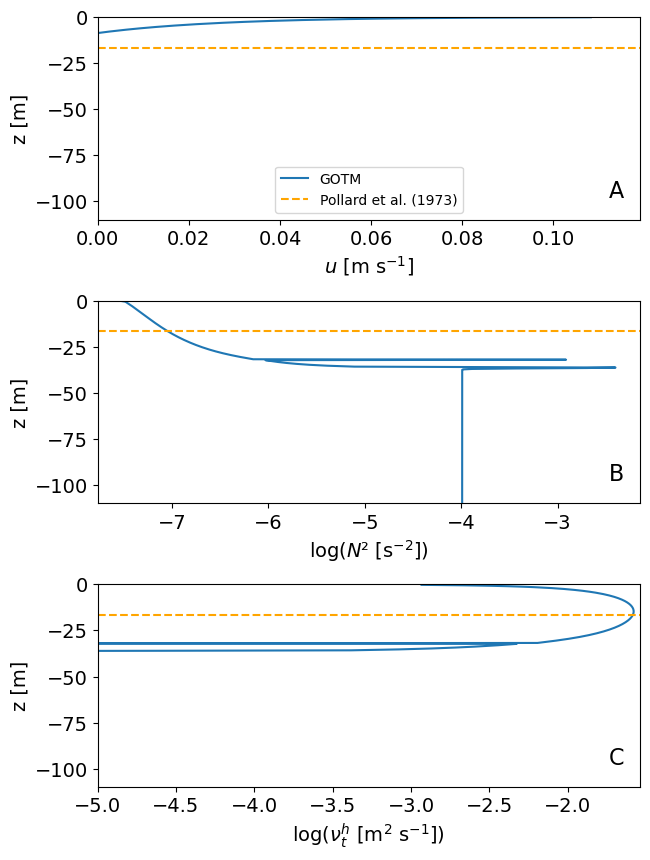

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_33084/861205145.py:120: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gist_heat')
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_33084/861205145.py:121: RuntimeWarning: divide by zero encountered in log10
  levels = MaxNLocator(nbins=40).tick_values(np.log10(NN).min(), np.log10(NN).max())
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_33084/861205145.py:122: RuntimeWarning: divide by zero encountered in log10
  CS2 = ax2.contourf(t/hour, zi1D, np.log10(NN.T), levels=levels, cmap=cmap.reversed())
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_33084/861205145.py:138: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use `

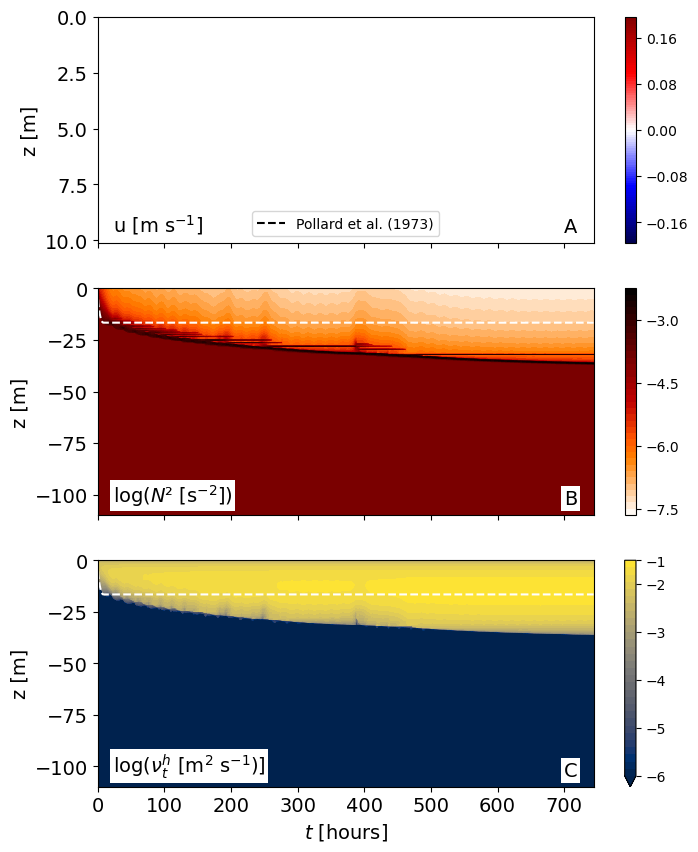

In [8]:
# load required packages
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib import colors


# model parameters (have to be consistent with gotm.yaml)
NN0     = 1.0e-4                    # initial NN 
lat     = 45.0                      # latitude 
tx      = 0.1027                    # surface stress

# derived parameters
f       = 4.*np.pi/86400.*np.sin(np.pi*lat/180.)      # Coriolis parameter
us      = np.sqrt(tx/1027.)                           # surface friction velocity

# load variables from netCDF
file        = 'entrainment_rot_30j.nc'
#file        = 'entrainment_NN1.nc'
entrainment = nc.Dataset(file)

z       = entrainment.variables['z'][:, :, 0, 0]
zi      = entrainment.variables['zi'][:, :, 0, 0]
t       = entrainment.variables['time'][:]
u       = entrainment.variables['u'][:, :, 0, 0]
nuh     = entrainment.variables['nuh'][:, :, 0, 0]
NN      = entrainment.variables['NN'][:, :, 0, 0]
u_taus  = entrainment.variables['u_taus'][:, 0, 0]


# plot all following profiles at time index iPlt
NT      = t.size
iPlt    = NT-1

# water depth
H       = - z[iPlt,0]-90

# entrainment depth without rotation (Pollard et al., 1973; Price, 1979)
Rv      = 0.6    # bulk Richardson number
h       = (2*Rv)**0.25 * us * (t/np.sqrt(NN0))**0.5
h_ref   = (2*Rv)**0.25 * us * (t[iPlt]/np.sqrt(NN0))**0.5


# entrainment depth with rotation (Pollard et al., 1973)
Rv      = 1.0    # bulk Richardson number
h       = us * ( ( 4*Rv*(1.0 - np.cos(f * t)) ) / ( f**2.0 * NN0 ) )**0.25
h_ref   = (8*Rv)**0.25 * us / ( f*np.sqrt(NN0) )**0.5

h[np.where(t > np.pi/f)] = h_ref


# plot vertical profiles at time index iPlt
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(7, 10))
plt.subplots_adjust(hspace=0.4)

bprops = {'facecolor': 'white', 'edgecolor': 'none', 'pad': 2}     # text label box properties

ax1.plot(u[iPlt, :], z[iPlt, :], label='GOTM')
ax1.axhline(y=-h_ref,color='orange', linestyle='--', label='Pollard et al. (1973)')
ax1.set_xlabel('$u$ [m s$^{-1}$]', fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_xlim([0, 1.1*np.max(u[iPlt, :])])
ax1.set_ylim([-H, 0])
ax1.legend(loc='lower center')
ax1.text(0.97, 0.2, 'A', verticalalignment='top', horizontalalignment='right',
         transform=ax1.transAxes, fontsize=16, bbox=bprops)
ax1.tick_params(labelsize=14)

ax2.plot(np.log10(NN[iPlt, :]), zi[iPlt, :])
ax2.axhline(y=-h_ref,color='orange', linestyle='--')
ax2.set_xlabel(r'log($N²$ [s$^{-2}$])', fontsize=14)
ax2.set_ylabel('z [m]', fontsize=14)
ax2.text(0.97, 0.2, 'B', verticalalignment='top', horizontalalignment='right',
         transform=ax2.transAxes, fontsize=16, bbox=bprops)
ax2.set_ylim([-H, 0])
ax2.tick_params(labelsize=14)

ax3.plot(np.log10(nuh[iPlt, :]), zi[iPlt, :])
ax3.axhline(y=-h_ref,color='orange', linestyle='--')
ax3.set_xlabel(r'log($\nu^h_t$ [m$^2$ s$^{-1}$])', fontsize=14)
ax3.set_ylabel('z [m]', fontsize=14)
ax3.set_xlim([-5, np.log10(1.1*np.max(nuh[iPlt, :]))])
ax3.set_ylim([-H, 0])
ax3.text(0.97, 0.2, 'C', verticalalignment='top', horizontalalignment='right',
         transform=ax3.transAxes, fontsize=16, bbox=bprops)
ax3.tick_params(labelsize=14)

plt.savefig('entrainment_rot.png')
plt.show()


# plot contour plot of entire time series
fig2, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8, 10))
plt.subplots_adjust(hspace=0.2)

# generate 1D z-axes for plotting (assuming that grid doesn't change)
z1D   = z[0, :]
zi1D  = zi[0, :]

hour  = 3600

levels = MaxNLocator(nbins=100).tick_values(-u.max(), u.max())
CS1 = ax1.contourf(t/hour, z1D,  u.T, levels=levels, cmap='seismic')
ax1.plot(t/hour, -h, '--', color='black',label='Pollard et al. (1973)')
ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.text(0.03, 0.03, 'u [m s$^{-1}$]', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.legend(loc='lower center')
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H+120, 0])
ax1.tick_params(labelsize=14)
ax1.xaxis.set_ticklabels([])
colorbar = fig2.colorbar(CS1, ax=ax1)
tick_locator = MaxNLocator(nbins=5)
colorbar.locator = tick_locator
colorbar.update_ticks()

cmap = plt.cm.get_cmap('gist_heat')
levels = MaxNLocator(nbins=40).tick_values(np.log10(NN).min(), np.log10(NN).max())
CS2 = ax2.contourf(t/hour, zi1D, np.log10(NN.T), levels=levels, cmap=cmap.reversed())
ax2.plot(t/hour, -h, '--', color='white')
#ax2.axhline(y=-h_ref,color='white', linestyle='--')
ax2.text(0.94, 0.03, 'B', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.text(0.03, 0.03, r'log($N²$ [s$^{-2}$])', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.set_ylabel('z [m]', fontsize=14)
ax2.set_ylim([-H, 0])
ax2.tick_params(labelsize=14)
ax2.xaxis.set_ticklabels([])
colorbar2 = fig2.colorbar(CS2, ax=ax2)
tick_locator = MaxNLocator(nbins=5)
colorbar2.locator = tick_locator
colorbar2.update_ticks()

cmap = plt.cm.get_cmap('cividis')
levels = MaxNLocator(nbins=40).tick_values(-6, np.log10(nuh).max())
CS3 = ax3.contourf(t/hour, zi1D, np.log10(nuh.T), levels=levels, extend='min', cmap=cmap)
ax3.plot(t/hour, -h, '--', color='white')
#ax3.axhline(y=-h_ref,color='white', linestyle='--')
ax3.text(0.94, 0.03, 'C', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax3.transAxes, fontsize=14, bbox=bprops)
ax3.text(0.03, 0.03, r'log($\nu^h_t$ [m$^2$ s$^{-1})$]', verticalalignment='bottom',
         horizontalalignment='left', backgroundcolor='w', transform=ax3.transAxes,
         fontsize=14, bbox=bprops)
ax3.set_xlabel('$t$ [hours]', fontsize=14)
ax3.set_ylabel('z [m]', fontsize=14)
ax3.set_ylim([-H, 0])
ax3.tick_params(labelsize=14)
tick_locator = MaxNLocator(nbins=5)
colorbar3 = fig2.colorbar(CS3, ax=ax3)
colorbar3.locator = tick_locator
colorbar3.update_ticks()

plt.savefig('entrainment2_rot.png')
plt.show()